In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings

In [5]:
births = Table.read_table('baby.csv')
births.show(6)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False


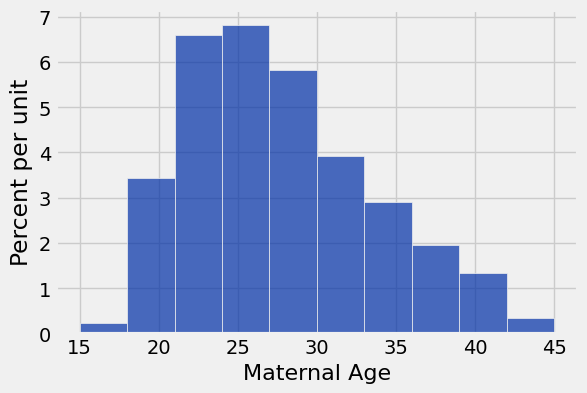

In [6]:
births.hist('Maternal Age')

In [7]:
np.mean(births.column('Maternal Age'))

27.228279386712096

### Question
What is the mean age of the mothers in the population?

# Bootstrap Method
Step 1: Write a function that simulates a new sample (with replacement) of the same size as the original
    and compute the mean.

Step 2: Run this function many times and collect all the simulated means.

Step 3: Generate a histogram to visualize the distribution of the means.

Step 4: Find a 95% confidence interval in the distribution.

# Step 1: Resample and Mean

In [8]:
# Use sample() to generate a new sample (with replacement) of the same size as the original
# Return the average
def one_bootstrap_mean():
    sim_sample = births.sample()
    ages = sim_sample.column('Maternal Age')
    mean_age = np.mean(ages)
    return mean_age

In [18]:
one_bootstrap_mean()

27.151618398637137

# Step 2: Simulate many times

In [19]:
# Generate means from 3000 bootstrap samples
# Store all the simulated averages in bstrap_means
bstrap_means = make_array()
for i in np.arange(3000):
    sim_mean = one_bootstrap_mean()
    bstrap_means = np.append(bstrap_means, sim_mean)

bstrap_means


array([ 27.31601363,  27.43441227,  27.12606474, ...,  26.97189097,
        27.18483816,  26.86797274])

# Step 3: Visualize distribution of simulated means

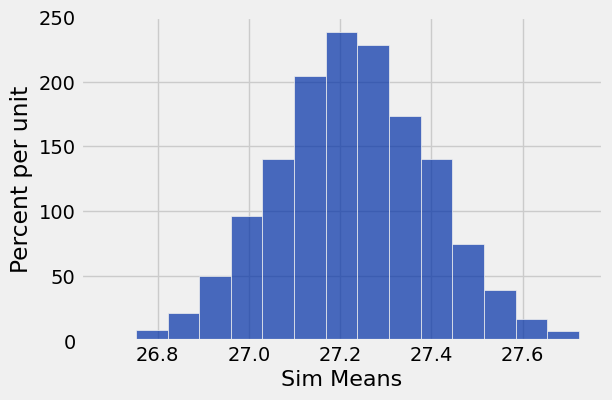

In [21]:
# Load the averages into a table using with_column.
# Generate a histogram with 15 bins.
means_table = Table().with_column('Sim Means', bstrap_means)
means_table.hist(bins=15)

# Step 4: Find 95% Confidence Interval

In [22]:
# Use the percentile function to find the 2.5 percentile and the 97.5 percentile (which leaves us 
# with the middle 95% confidence interval)
# Store these values in the variables "left" and "right", respectively
left = percentile(2.5, bstrap_means)
right = percentile(97.5, bstrap_means)
print(left, right)

26.9028960818 27.5528109029


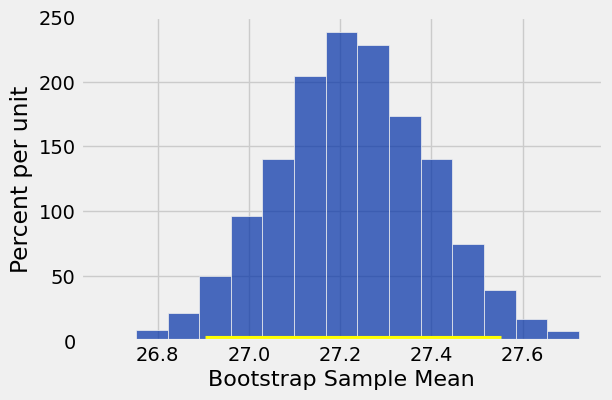

In [23]:
means_table = Table().with_columns('Bootstrap Sample Mean', bstrap_means)
means_table.hist(bins=15)
plots.plot([left, right], [0, 0], color='yellow', lw=8);